# Estimate Outbreak Size in Wuhan after City shut down

#### Author: Yiran JIng
#### Date: Feb 2 2020


### SIR epidemic model

- S for the number susceptible,指未得病者，但缺乏免疫能力，与感病者接触后容易受到感染。
- I for the number of infectious
- R for the number removed: 移除人群是因病愈(具有免疫力)或死亡而不再参与感染和 被感染过程的人
- N the constancy of population
- β the effective `contact rate` of the disease: an infected individual comes into contact with βN other individuals per unit time
- γ  is the mean recovery rate: that is, 1/γ is the mean period of time during which an infected individual can pass it on. i.e. the transition rate between I and R. If the mean duration of the infection is denoted D, then γ = 1/D
- βI: transition rate between S and I

It's assumed that the permanence of each single subject in the epidemic states is a random variable with exponential distribution. 

S(t)+I(t)+R(t)=N (consistent) # t is time 



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sir import SIR
from helper_fun_SIR import *
import scipy.optimize as optimization
import warnings
warnings.filterwarnings('ignore')

## 2019-nCoV case
### Estimate parameters of Baseline:
1. mu = 1/14, (suppose the mean duration of the infection is 14 days)
1. S0 = N = 11000000, I0 = 1, R0 = 0
   - In the initial status, suppose **N ≈ S** (i.e. all the people in are uninfected, expect one infected case, no people die or recovered)
   

### Assumption:
1. before 23 Jan, Suppose the mean of the number of people a confirmed case contacts daily is 5. (K = 5) (low conscuousness of wearing facial mask)
2. after 23 Jan, k = 1 (high conscuousness of 2019-nCoV)

In [45]:
# count 2019-12-08 as the first date, when find the first case. 
t = np.asarray([0, 42, 43, 44, 45, 46])  # time
I = np.asarray([1,198,218,320,478,639]) # number of official confirmed cases

### Before 23 Jan 
- population in Wuhan is 11000000
- people have low conscuousness of wearing facial mask, so k = 5


Estimate the transmission probablity: 0.04 
Estimated R0(basic reproduction number): 2.9

Maximum infected case:  3243932


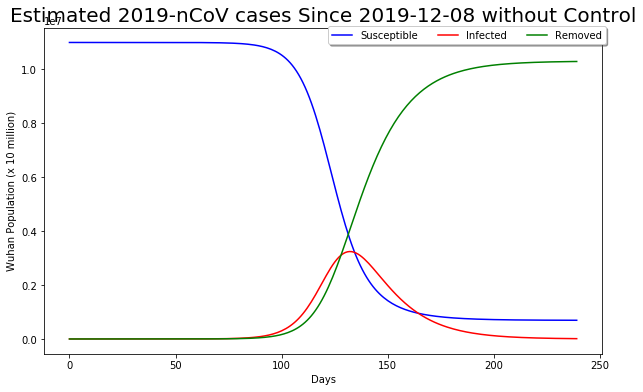

In [46]:
"""
Baseline: before 23 Jan 
"""
nu = 1/14
k = 5
S0 = N = 11000000

# estimate beta and R0
Est = Estimate_parameter(nu = nu, k = k, t = t, I = I)
print(Est)

# run SIR model
sir = SIR(eons=240, Susceptible=N-1, Infected=1, Resistant=0, 
          rateSI=Est.beta, rateIR=nu)
sir.run()
sir.plot('Estimated 2019-nCoV cases Since 2019-12-08 without Control',
        'Wuhan Population (x 10 million)')


Estimate the transmission probablity: 0.04 
Estimated R0(basic reproduction number): 2.9

Maximum infected case:  5600514


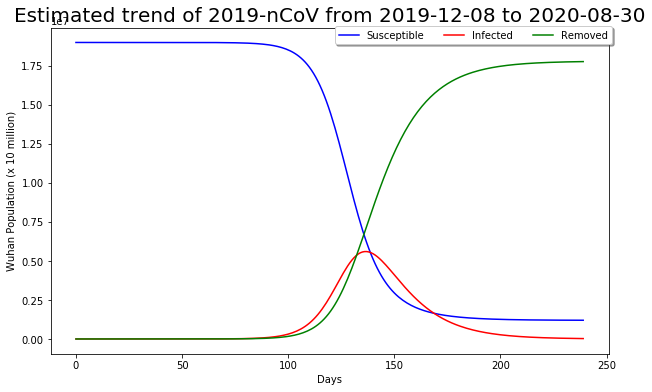

In [4]:
"""
S0 = N = 19000000: 
Considering the effective catchment population of Wuhan
"""
nu = 1/14
k = 5
S0 = N = 19000000

# estimate beta and R0
Est = Estimate_parameter(nu = nu, k = k, t = t, I = I)
print(Est)

# run SIR model
sir = SIR(eons=240, Susceptible=N-1, Infected=1, Resistant=0, 
          rateSI=Est.beta, rateIR=nu)
sir.run()
sir.plot('Estimated trend of 2019-nCoV from 2019-12-08 to 2020-08-30',
        'Wuhan Population (x 10 million)')

## After 23 Jan
1. N = 9000000: official report the number of people stayed in Wuhan
2. The case after Wuhan shut down (after 23 Jan):
   - k = 1: high conscuousness of 2019-nCoV
   

Maximum infected case:  3594355


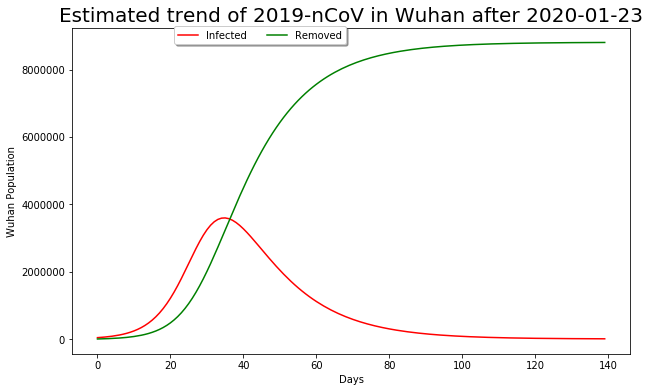

In [98]:
N = 9000000
S0 = 40000
est_R = 500

# run SIR model
sir = SIR(eons=140, Susceptible=N-S0, Infected=S0, Resistant=est_R, 
          rateSI=Est.beta, rateIR=nu)
sir.run()
sir.plot_noSuscep('Estimated trend of 2019-nCoV in Wuhan after 2020-01-23',
        'Wuhan Population')


Maximum infected case:  3045072


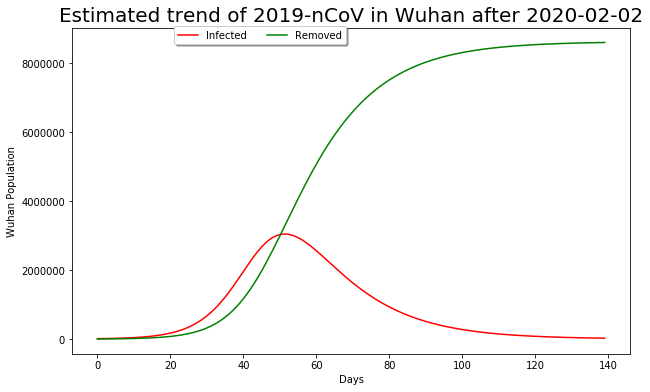

In [99]:
"""
after Wuhan shut down (after 23 Jan)
beta: The contact rate is half than before
N = 9000000
curedCount: 215
deadCount: 294
"""

past_days = 47 # the number of past days after 2019-12-08
t = np.asarray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # 2020-01-24 - 2020-02-02
t = t + past_days
I = np.asarray([549,730,1058,1423,2714,3554, 4903, 5806, 7153, 9074]) # number of official confirmed cases
#I = I +40000 # estimated number of cases before 23 Jan 
nu = 1/14
k = 1
N = 9000000 # number of people left in Wuhan 
S0 = I[-1]

Est = Estimate_parameter(nu = nu, k = k, t = t, I = I)
#print(Est)


# run SIR model
sir = SIR(eons=140, Susceptible=N-S0, Infected=S0, Resistant=(215+294), 
          rateSI=Est.beta, rateIR=nu)
sir.run()
sir.plot_noSuscep('Estimated trend of 2019-nCoV in Wuhan after 2020-02-02',
        'Wuhan Population')

Maximum infected case:  541499


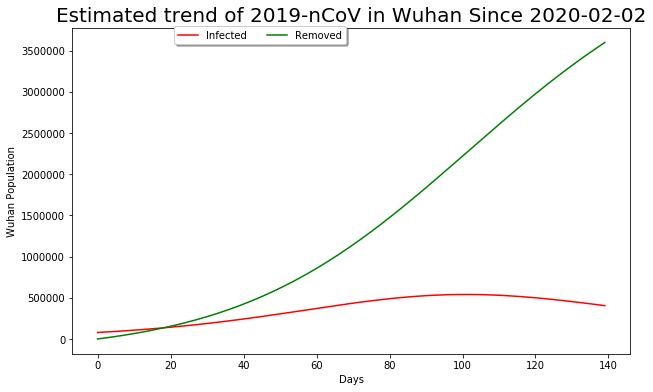

In [55]:
"""
after Wuhan shut down (after 23 Jan)
beta = est_beta/2 : under better control
N = 9000000
curedCount: 215
deadCount: 294
S0 = 40000*2 
"""

past_days = 47 # the number of past days after 2019-12-08
#t = np.asarray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # 2020-01-24 - 2020-02-02
#t = t + past_days
#I = np.asarray([549,730,1058,1423,2714,3554, 4903, 5806, 7153, 9074]) # number of official confirmed cases
#I = I*2 +40000 # estimated number of cases before 23 Jan 
nu = 1/14
N = 9000000 # number of people left in Wuhan 
#S0 = I[-1]
S0 = 40000*2 

est_beta = Est.beta/2  #the contact rate is half than before


# run SIR model
sir = SIR(eons=140, Susceptible=N-S0, Infected=S0, Resistant=(215+294+1000), 
          rateSI=est_beta, rateIR=nu)
sir.run()
sir.plot_noSuscep('Estimated trend of 2019-nCoV in Wuhan Since 2020-02-02',
        'Wuhan Population')

In [ ]:
# 湖北航天医院医师胡电波的话说，汇总后统计发烧人群为10万人